## Absolute vs. Relative Frequency
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('data/pokemon.csv')
print(pokemon.shape)
#pokemon.head(10)

(807, 14)


One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

Text(0,0.5,'proportion')

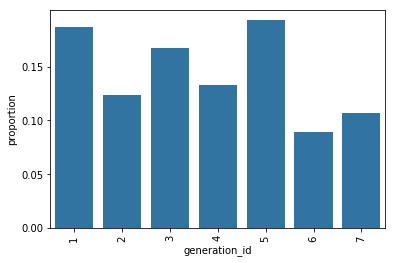

In [12]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = pokemon.shape[0]
max_count = pokemon['generation_id'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion')

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

### Additional Variation
Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

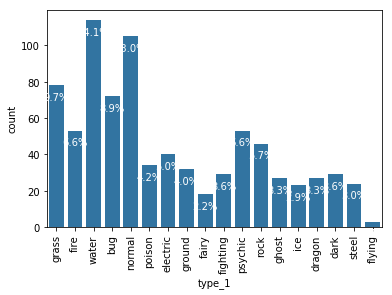

In [13]:
# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = pokemon, x = 'type_1', color = base_color)

# add annotations
n_points = pokemon.shape[0]
cat_counts = pokemon['type_1'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

plt.xticks(rotation = 90)
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'w')


Use the `.get_text()` method to obtain the category name, so I can get the count of each category level. At the end, I use the text function to print each percentage, with the x-position, y-position, and string as the three main parameters to the function.

### Counting Missing Data

We can use pandas functions to create a table with the number of missing values in each column.

In [17]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

Seaborn's barplot function is built to depict a summary of one quantitative variable against levels of a second, qualitative variable, but can be used here.

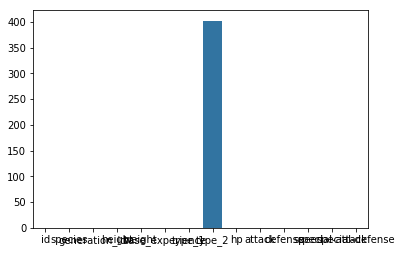

In [18]:
na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)

The first argument to the function contains the x-values (column names), the second argument the y-values (our counts).